#**This program detects breast cancer, based off of data.**

# **Importing  libraries**

In [170]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# **Importing dataset** 

In [171]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab 
df = pd.read_csv('data.csv') 
df.head(7)

Saving data.csv to data (2).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


# **Data exploration and handling missing values** 

In [172]:
#Count the number of rows and columns in the data set
df.shape

(569, 33)

In [173]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [174]:
#Drop the column with all missing values (na, NAN, NaN)
df=df.dropna(axis = 1)
df.shape

(569, 32)

In [175]:
#Get a count of the number of 'Malignant(M)' & 'Bengin(B)' cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


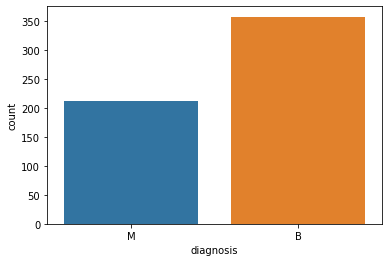

In [176]:
#visualise the count.
print(sns.countplot(df['diagnosis'], label ="Count"))

In [177]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [178]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


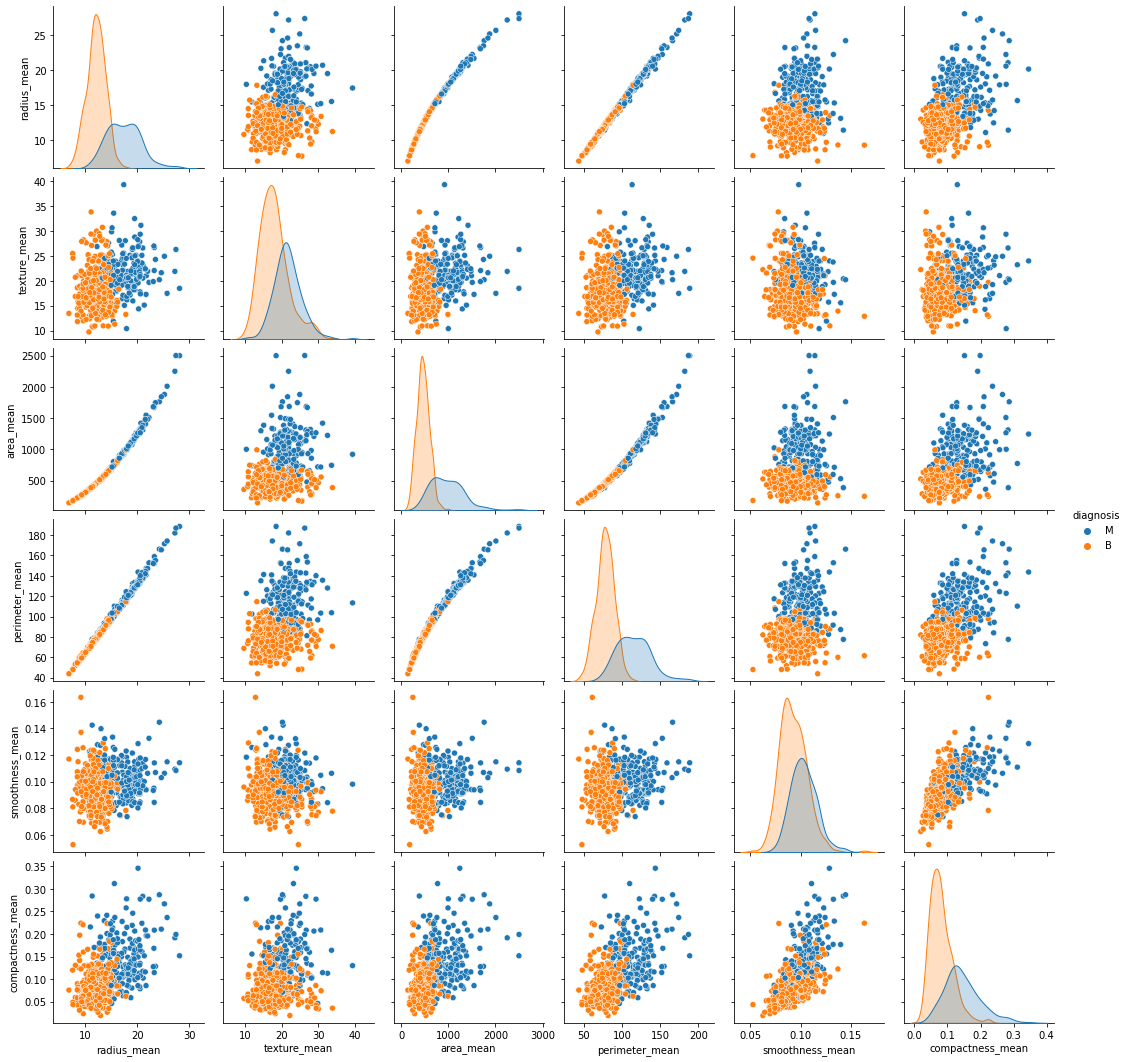

In [179]:
sns.pairplot(data = df,hue = "diagnosis",vars = ['radius_mean','texture_mean','area_mean','perimeter_mean','smoothness_mean','compactness_mean'])

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [181]:
#Get the correlation of the columns
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


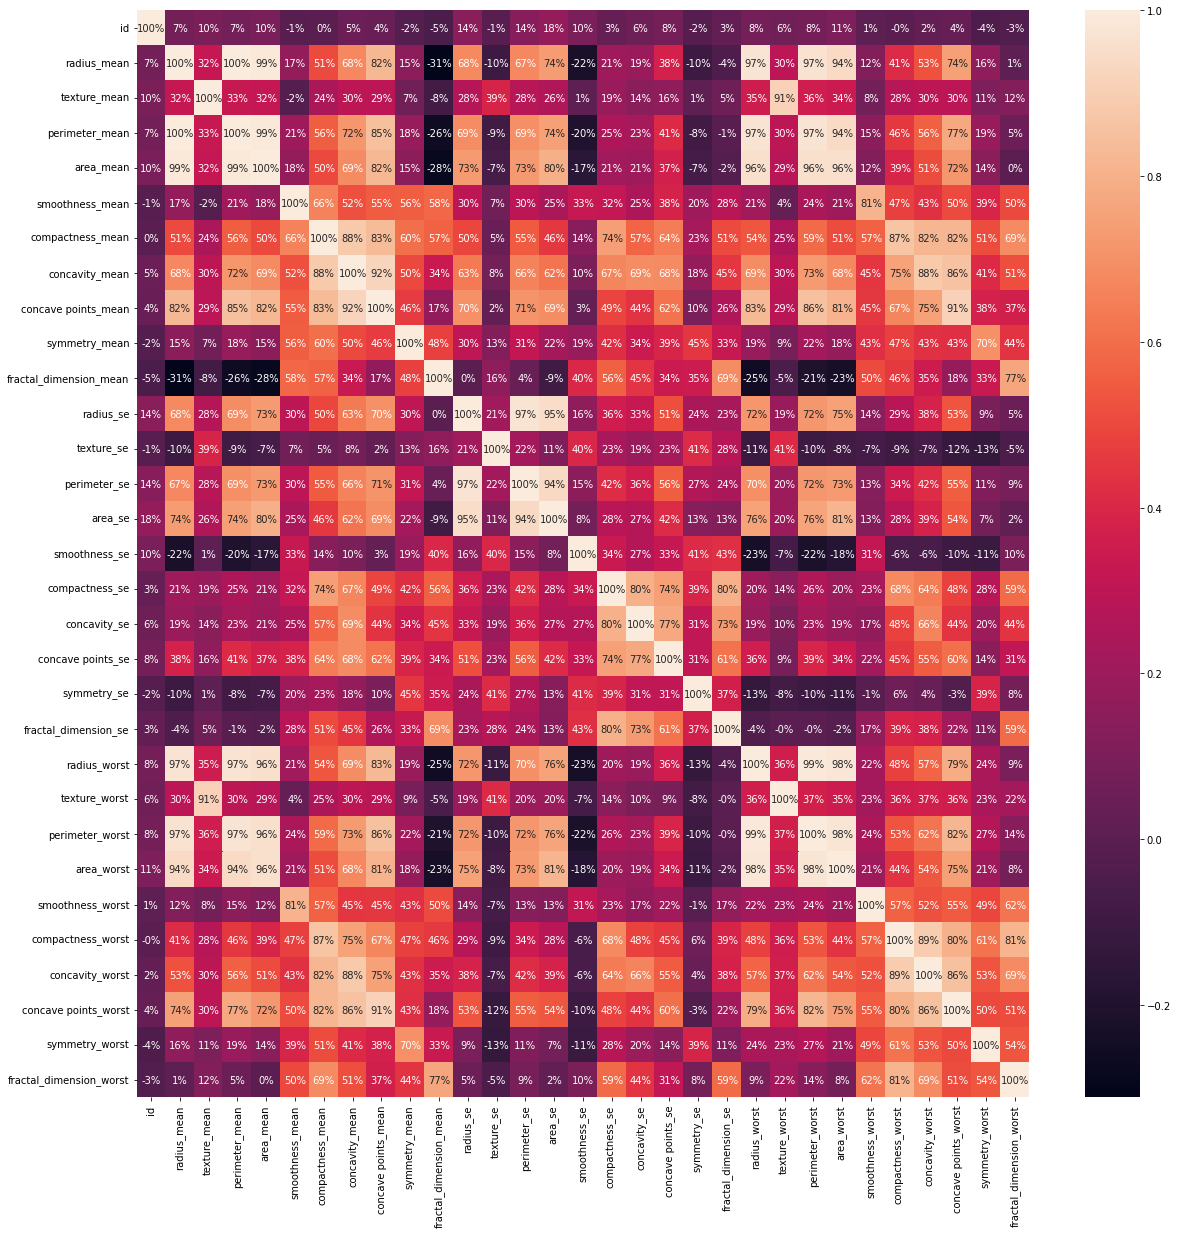

In [182]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

# **Data processing** 

In [183]:
#Encoding categorical data values i.e. diagnosis. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1]= le.fit_transform(df.iloc[:,1].values)
print(df.iloc[:,1].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [184]:
#Now splitting dataset into dependent and independent dataset.

X = df.iloc[:, 2:31].values 
y = df.iloc[:, 1].values 

In [185]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)



In [188]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [191]:
  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)
  y_pred=tree.predict(X_test)

# **Training different model on the Training set** 

In [194]:
def models(X_train , y_train):
  #using logistic regression.
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train , y_train)

  #using KNeighnors classification.
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  
  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)


    #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

  return log , knn, svc_lin, svc_rbf, gauss, tree, forest

In [195]:
model = models(X_train,y_train)
print(model)

[0]Logistic Regression Training Accuracy: 0.9912087912087912
[1]K Nearest Neighbor Training Accuracy: 0.9802197802197802
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[4]Gaussian Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978
(LogisticRegression(random_state=0), KNeighborsClassifier(), SVC(kernel='linear', random_state=0), SVC(random_state=0), GaussianNB(), DecisionTreeClassifier(criterion='entropy', random_state=0), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))


In [196]:

from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[65  2]
 [ 3 44]]
Model[0] Testing Accuracy = "0.956140350877193!"

[[67  0]
 [ 5 42]]
Model[1] Testing Accuracy = "0.956140350877193!"

[[64  3]
 [ 1 46]]
Model[2] Testing Accuracy = "0.9649122807017544!"

[[67  0]
 [ 2 45]]
Model[3] Testing Accuracy = "0.9824561403508771!"

[[62  5]
 [ 5 42]]
Model[4] Testing Accuracy = "0.9122807017543859!"

[[62  5]
 [ 3 44]]
Model[5] Testing Accuracy = "0.9298245614035088!"

[[66  1]
 [ 2 45]]
Model[6] Testing Accuracy = "0.9736842105263158!"



In [197]:
#Show other ways to get the classification accuracy & other metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  1
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted 

#Printing Prediction of test set  by Support Vector Machine (RBF Classifier) model 

In [200]:
#Print Prediction of Support Vector Machine (RBF Classifier) model
y_pred = model[3].predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [201]:
model[3]

SVC(random_state=0)

#**IMPROVING THE MODEL - PART 2**

##Applying k-Fold Cross Validation¶

In [202]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score (estimator = model[3] , X=X_train ,y=y_train , cv =10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100)) #this print accuracy in percentge format. important code****.
print("Standard deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 97.59%
Standard deviation: 1.53%


In [203]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.25,0.5,0.75,1,10,100],'kernel':["rbf"],'gamma':[0.1,0.2,0.,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator= model[3],
                          param_grid = parameters , 
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_


In [204]:
print(best_parameter)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [205]:
print(best_accuracy )

0.9604347826086957


In [221]:
grid_predictions = grid_search.predict(X_test)

In [222]:
cm = confusion_matrix(y_test, grid_predictions)

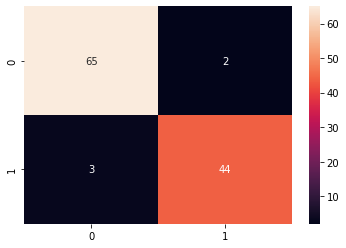

In [223]:
sns.heatmap(cm, annot=True)

In [224]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# ***That's pretty good accuracy.***